<a href="https://colab.research.google.com/github/BASSI101/SakshamMishra_JioInstitute/blob/main/Session_8_MRM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install necessary libraries
!pip install face_recognition opencv-python pillow

# Import libraries
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import face_recognition
from google.colab import files

# Upload the image (manually upload via Colab's file interface)
uploaded = files.upload()

# Load and process the uploaded image
image_path = list(uploaded.keys())[0]
image = Image.open(image_path)

# Display the uploaded image
plt.imshow(image)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()

# Convert the image to a numpy array for processing
image_np = np.array(image)

# Detect faces using face_recognition (HOG-based detection)
face_locations = face_recognition.face_locations(image_np, model='hog')

# Calculate face-to-image size ratio
image_height, image_width = image_np.shape[:2]

face_ratios = []
for top, right, bottom, left in face_locations:
    face_height = bottom - top
    face_width = right - left
    face_area = face_height * face_width
    image_area = image_height * image_width
    face_ratio = face_area / image_area
    face_ratios.append(face_ratio)

# Output the results
face_count = len(face_locations)
average_face_ratio = np.mean(face_ratios) if face_ratios else 0

print(f"Number of faces detected: {face_count}")
print(f"Average face-to-image size ratio: {average_face_ratio:.4f}")

# Draw rectangles around detected faces
for (top, right, bottom, left) in face_locations:
    cv2.rectangle(image_np, (left, top), (right, bottom), (255, 0, 0), 2)

# Convert to RGB and display the image with bounding boxes
plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Detected Faces")
plt.show()


RuntimeError: Error while calling cudaGetDevice(&the_device_id) in file /root/.cache/uv/sdists-v4/pypi/dlib/19.24.2/wJ21y9fWLAAfM7Pm6Ge3a/dlib-19.24.2.tar.gz/dlib/cuda/gpu_data.cpp:204. code: 35, reason: CUDA driver version is insufficient for CUDA runtime version

25-02-10 07:17:49 - Directory /root/.deepface has been created
25-02-10 07:17:49 - Directory /root/.deepface/weights has been created
25-02-10 07:17:50 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 18.5MB/s]


Detected Emotion: happy
Face Proportion in Image: 1.07%


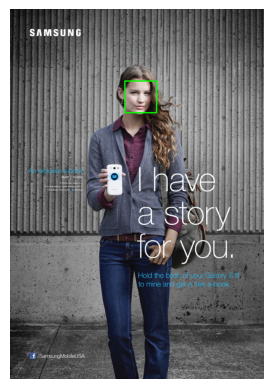

In [10]:
import cv2
import numpy as np
from deepface import DeepFace

# Load image
image_path = "Samsung poster.jpg"  # Change this to your image path
image = cv2.imread(image_path)

# Load OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Get image dimensions
img_height, img_width = image.shape[:2]

# Analyze each face
for (x, y, w, h) in faces:
    # Draw rectangle around the face
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Calculate face size proportion
    face_area = w * h
    image_area = img_width * img_height
    face_proportion = face_area / image_area

    # Crop face region for emotion detection
    face_crop = image[y:y+h, x:x+w]

    # Save cropped face as temp file
    face_temp_path = "temp_face.jpg"
    cv2.imwrite(face_temp_path, face_crop)

    # Analyze emotion using DeepFace
    analysis = DeepFace.analyze(face_temp_path, actions=['emotion'], enforce_detection=False)
    emotion = analysis[0]['dominant_emotion']

    print(f"Detected Emotion: {emotion}")
    print(f"Face Proportion in Image: {face_proportion:.2%}")

# Display the image with face rectangle
import matplotlib.pyplot as plt

# Convert image from BGR (OpenCV format) to RGB (Matplotlib format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis("off")  # Hide axis
plt.show()

In [9]:
!pip install opencv-python numpy deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=467e179042a7d57fd1034977c2694450f29d5676d240c9a1147cd78807a8ec85
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire
